# STOCK MARKET ANALYSIS

This project is an analysis of the way various stocks have performed in the National Stock Exchange. I have tried to visualise opening, closing and high values of stocks on each day. Using graphs, we can analyse the performace of each stock and judge the time when the stock reached its highest or lowest price. Then we can also list and separate the companies of various sectors.
Now, talking about the dataset, it contains 235192 rows and 14 columns about the name, closing, opening, highest and lowest price of every stock.

## Downloading the Dataset

Here, I have downloaded the dataset of the stock market from Kaggle using my username and API key of kaggle.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
url = 'https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=stock_metadata.csv' 
import opendatasets as od
od.download(url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: swarnshahi
Your Kaggle Key: ········


100%|██████████| 18.4M/18.4M [00:00<00:00, 51.3MB/s]


The dataset has been downloaded and extracted.

In [3]:
data_dir = './nifty50-stock-market-data'

In [4]:
import os
os.listdir(data_dir)

['HINDUNILVR.csv',
 'GRASIM.csv',
 'DRREDDY.csv',
 'CIPLA.csv',
 'ICICIBANK.csv',
 'HDFC.csv',
 'BAJAJ-AUTO.csv',
 'RELIANCE.csv',
 'WIPRO.csv',
 'HCLTECH.csv',
 'BPCL.csv',
 'TECHM.csv',
 'COALINDIA.csv',
 'MM.csv',
 'HINDALCO.csv',
 'TATASTEEL.csv',
 'INDUSINDBK.csv',
 'HDFCBANK.csv',
 'VEDL.csv',
 'NESTLEIND.csv',
 'LT.csv',
 'ONGC.csv',
 'UPL.csv',
 'ITC.csv',
 'BRITANNIA.csv',
 'ZEEL.csv',
 'BAJAJFINSV.csv',
 'EICHERMOT.csv',
 'TITAN.csv',
 'TATAMOTORS.csv',
 'NIFTY50_all.csv',
 'IOC.csv',
 'stock_metadata.csv',
 'INFY.csv',
 'POWERGRID.csv',
 'MARUTI.csv',
 'NTPC.csv',
 'HEROMOTOCO.csv',
 'SHREECEM.csv',
 'ASIANPAINT.csv',
 'ULTRACEMCO.csv',
 'INFRATEL.csv',
 'GAIL.csv',
 'BAJFINANCE.csv',
 'JSWSTEEL.csv',
 'ADANIPORTS.csv',
 'AXISBANK.csv',
 'SUNPHARMA.csv',
 'TCS.csv',
 'BHARTIARTL.csv',
 'KOTAKBANK.csv',
 'SBIN.csv']

Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = "zerotopandas-course-project-starter" 

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "swarn-shahi-cd-eee20/stock-market-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/swarn-shahi-cd-eee20/stock-market-analysis


'https://jovian.ai/swarn-shahi-cd-eee20/stock-market-analysis'

## Data Preparation and Cleaning

Since we have 15 columns in the dataset, it would become very complex to analyse data. So we will now remove the unwanted string columns like "Series", "Trades" etc. using drop() function.



In [9]:
import numpy as np
import pandas as pd

Now we load the dataset into our dataframe.

In [10]:
stock_metadata_df = pd.read_csv('./nifty50-stock-market-data/stock_metadata.csv')
type(stock_metadata_df)

pandas.core.frame.DataFrame

Now let us create a copy of our dataset because we will make changes to this dataset and we can use its copy if we need the raw dataset again in future.

In [11]:
stock_metadata_df
df6 = stock_metadata_df.copy()

In [12]:
NIFTY50_all_df = pd.read_csv('./nifty50-stock-market-data/NIFTY50_all.csv')
NIFTY50_all_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [13]:
NIFTY50_all_df['Date'] = pd.to_datetime(NIFTY50_all_df.Date)
NIFTY50_all_df.set_index('Date', inplace=True)

In [14]:
df2 = NIFTY50_all_df.copy()

Now let us gather basic statistical information about our dataset like mean, minimun, maximum, standard deviation etc for each column using describe() function.

In [15]:
df2.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,1.203440e+05,2.191150e+05,219115.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,6.866457e+04,2.831670e+06,0.190019
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,2.183400e+04,1.253830e+05,0.364700
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,7.893550e+04,1.452233e+06,0.638400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


In [16]:
df3 = df2.groupby(by= 'Symbol')
df2

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864


In [17]:
df2.shape

(235192, 14)

Now let us drop unwanted columns which contain string data rather than numbers and also numbers which are of no use to us. In short, we are cleaning the data using drop() function.

In [18]:
df2.drop(['Series', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble', 'Prev Close', 'Last'], axis=1, inplace= True)
df2

,Symbol,Open,High,Low,Close
Date,,,,,
2007-11-27,MUNDRAPORT,770.00,1050.00,770.00,962.90
2007-11-28,MUNDRAPORT,984.00,990.00,874.00,893.90
2007-11-29,MUNDRAPORT,909.00,914.75,841.00,884.20
2007-11-30,MUNDRAPORT,890.00,958.00,890.00,921.55
2007-12-03,MUNDRAPORT,939.75,995.00,922.00,969.30
...,...,...,...,...,...
2021-04-26,ZEEL,190.60,191.10,185.10,186.40
2021-04-27,ZEEL,188.00,192.95,186.80,188.15
2021-04-28,ZEEL,188.80,190.60,187.10,189.10


Now, here we find list of different stocks that are listed in the dataset.

In [19]:
df2.Symbol.unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [20]:
df3 = df2.groupby(by= 'Symbol')
df3

Now let us find and print the highest closing value of top 3 days for each share.

In [21]:
res = df3.apply(lambda x: x.sort_values(by= 'Close', ascending=False).head(3))
print(res)

                           Symbol     Open     High      Low    Close
Symbol     Date                                                      
ADANIPORTS 2021-04-06  ADANIPORTS   756.00   852.70   743.00   835.55
           2021-04-09  ADANIPORTS   824.75   837.00   817.05   823.60
           2021-04-08  ADANIPORTS   818.00   838.00   806.00   823.00
ASIANPAINT 2013-07-18  ASIANPAINT  5016.00  5229.00  5006.10  5213.10
           2013-07-19  ASIANPAINT  5221.10  5247.75  5150.05  5165.40
...                           ...      ...      ...      ...      ...
ZEEL       2018-01-29        ZEEL   599.00   619.00   599.00   608.90
           2018-01-22        ZEEL   599.80   616.70   598.00   608.85
ZEETELE    2000-02-24     ZEETELE  1499.00  1585.00  1485.00  1541.70
           2000-03-06     ZEETELE  1510.00  1554.85  1478.30  1535.00
           2000-02-22     ZEETELE  1550.05  1577.70  1512.25  1528.05

[195 rows x 5 columns]


In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "swarn-shahi-cd-eee20/stock-market-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/swarn-shahi-cd-eee20/stock-market-analysis


'https://jovian.ai/swarn-shahi-cd-eee20/stock-market-analysis'

## Exploratory Analysis and Visualization

**Now let us visualise data using various charts and plots.**



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (30,18)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Here, we find mean of high, closing, opening and low value of each share in the dataframe.

In [25]:
df3.mean()

,Open,High,Low,Close
Symbol,,,,
ADANIPORTS,294.420705,299.126599,289.125642,294.111766
ASIANPAINT,1247.683952,1264.625349,1230.900697,1247.410903
AXISBANK,824.703020,838.289702,809.950545,824.058898
BAJAJ-AUTO,2191.537883,2219.934510,2162.215209,2190.412196
BAJAJFINSV,2760.382381,2803.614449,2716.731443,2758.657451
...,...,...,...,...
UTIBANK,163.685225,167.231904,159.524451,163.126203
VEDL,183.575911,186.638225,180.105297,183.293489
WIPRO,756.799981,772.478364,738.150886,754.474783


Now for practice let us find minimum opening value of each share.

In [26]:
df3.Open.min()

Symbol
ADANIPORTS    108.00
ASIANPAINT    210.00
AXISBANK      290.00
BAJAJ-AUTO    262.00
BAJAJFINSV     88.15
               ...  
UTIBANK        21.00
VEDL           61.80
WIPRO         163.10
ZEEL           92.00
ZEETELE        62.00
Name: Open, Length: 65, dtype: float64

Now, we plot a line graph showing closing value of all the shares.

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864


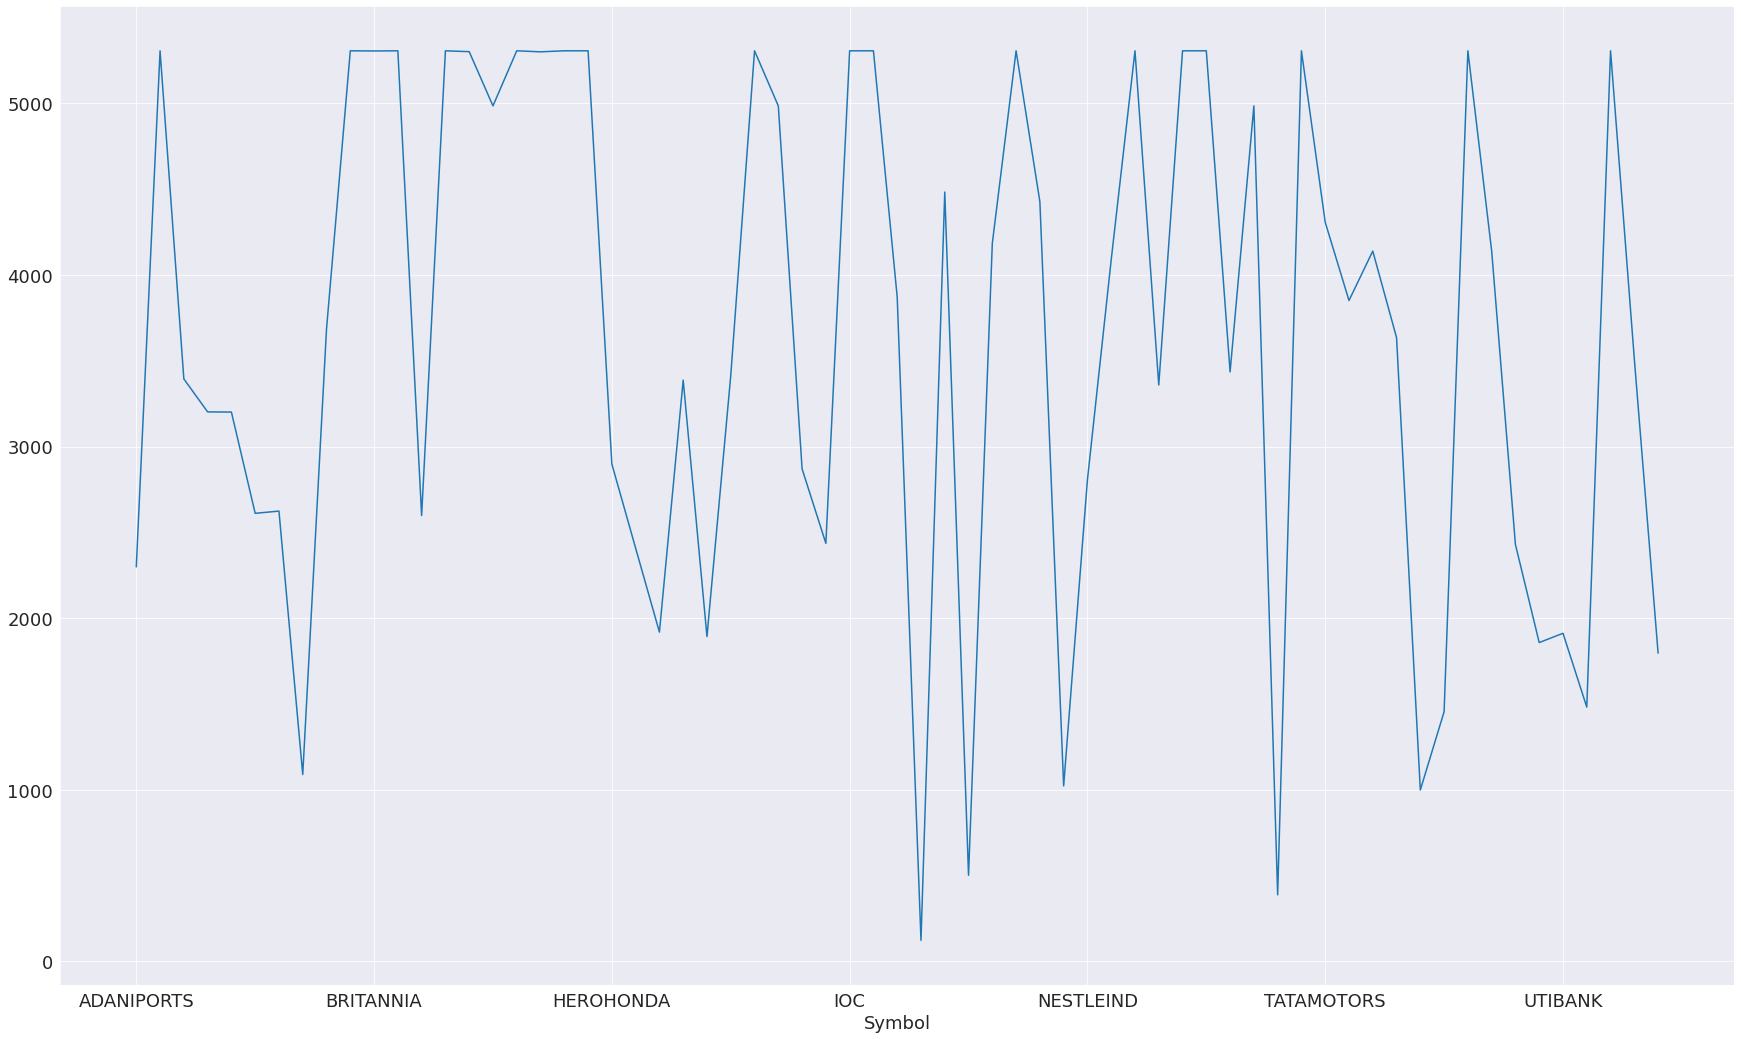

In [27]:
df4 = NIFTY50_all_df.copy()
r1 = df4.groupby(['Symbol']).count()['Close']
r1.plot()
df4

Here, let us visualise opening and closing value of a share "ZEEL".

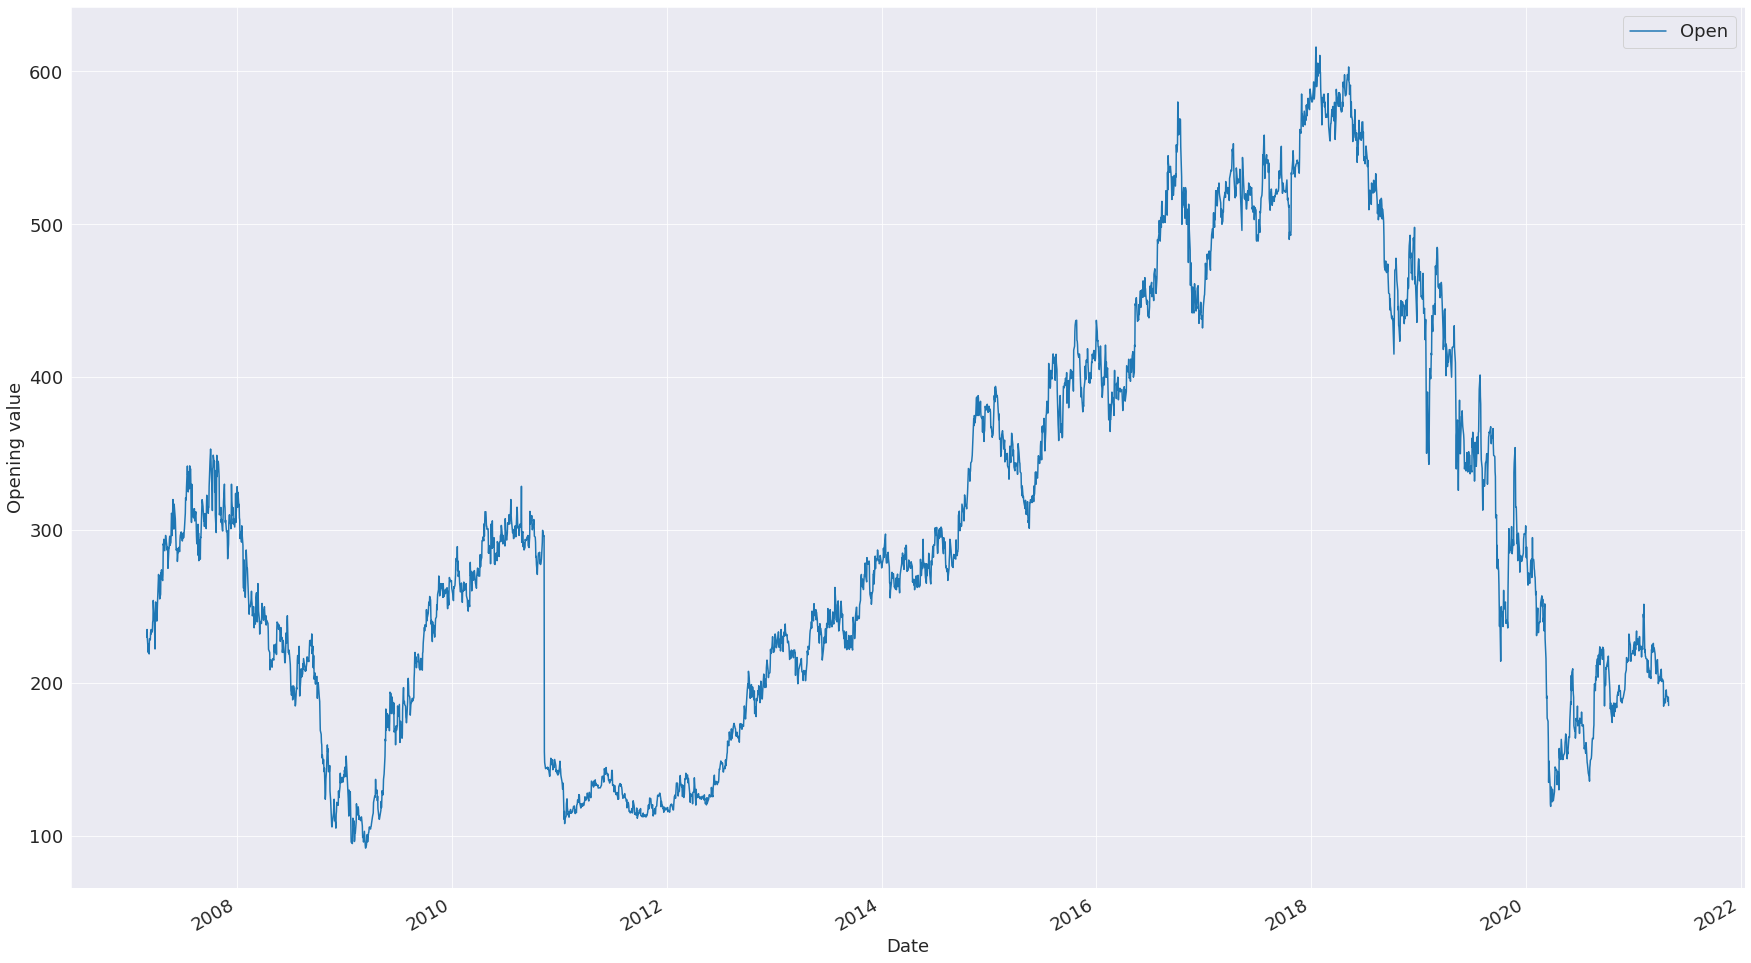

In [28]:
df4[df4['Symbol'] == "ZEEL"].Open.plot()
plt.xlabel("Date")
plt.ylabel("Opening value")
plt.legend()
sns.set_style("whitegrid")

The above graph makes it easier to visualise that the share price reaches its minimum in 2009 at around April.

In [29]:
print(df4[df4['Symbol'] == "ZEEL"].Open.min())

92.0


In [30]:
df5 = pd.read_csv('./nifty50-stock-market-data/NIFTY50_all.csv')
df5

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


Now, let us analyse closing price of ZEEL with time given in the dataset.

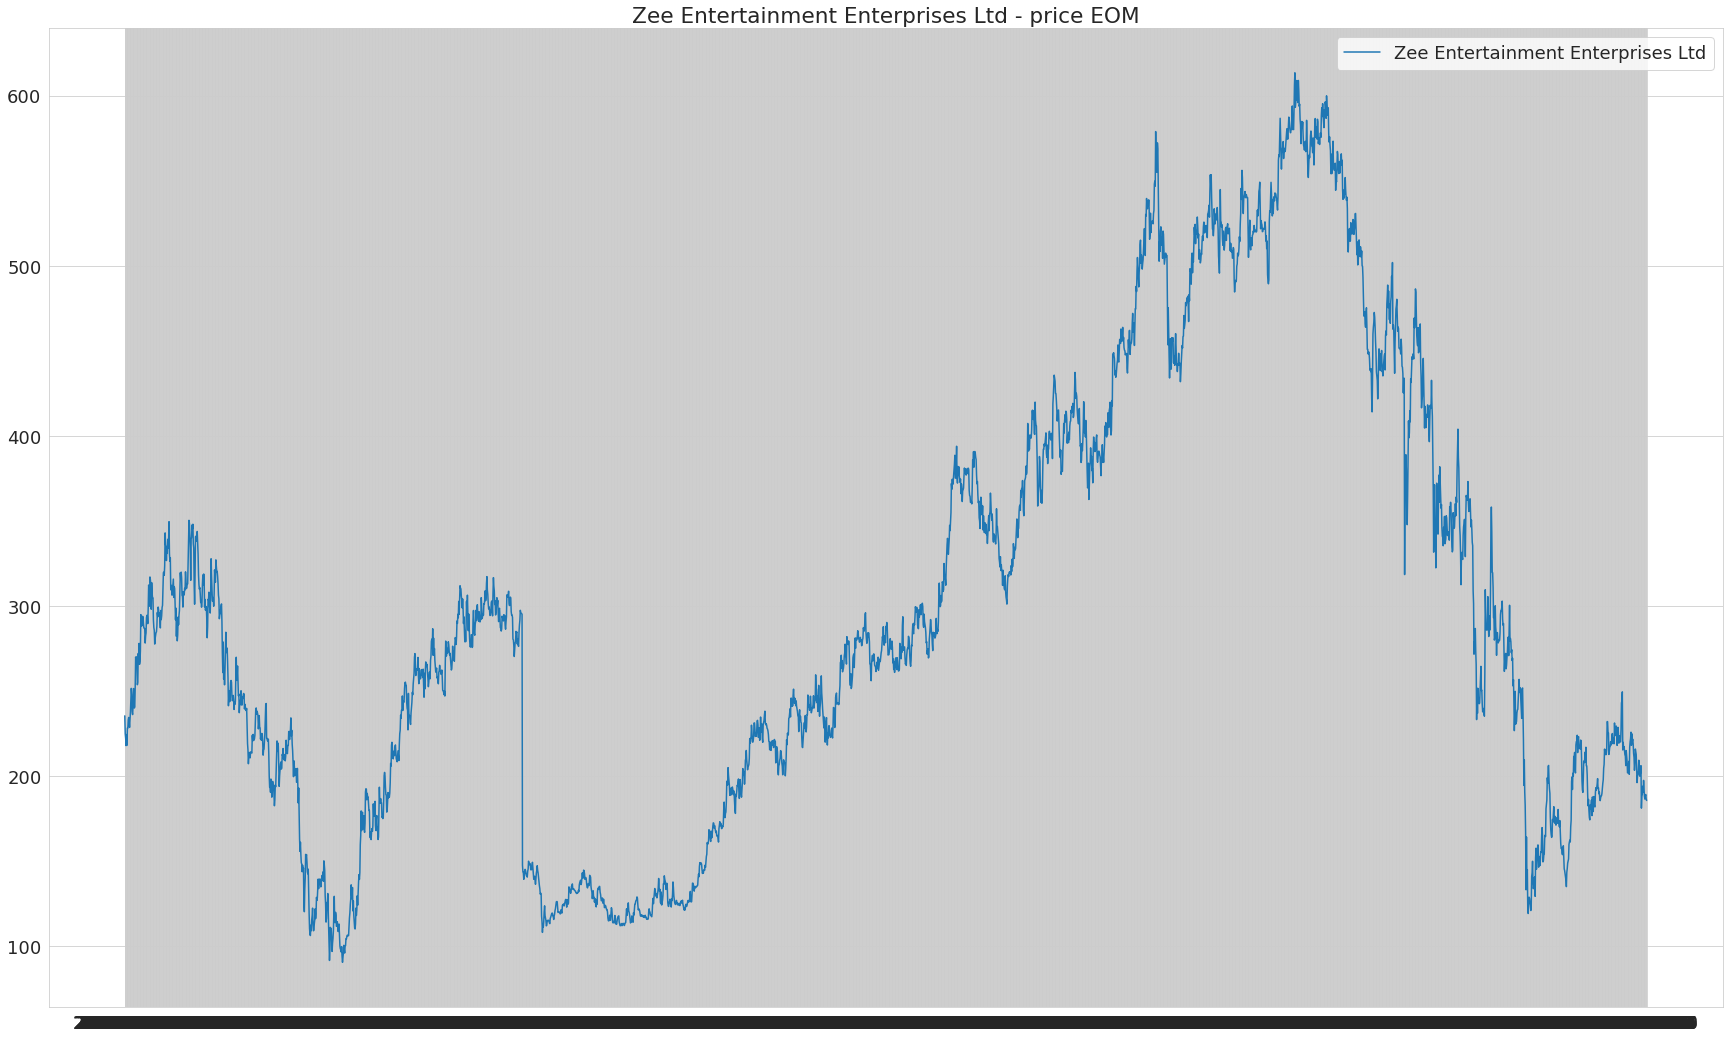

In [31]:
analysis_1 = df5[df5['Symbol'] == "ZEEL"]
plt.plot(analysis_1.Date, analysis_1.Close);
plt.title("Zee Entertainment Enterprises Ltd - price EOM")
plt.legend(['Zee Entertainment Enterprises Ltd']);

Now, analysing Maruti share price on a bar graph.

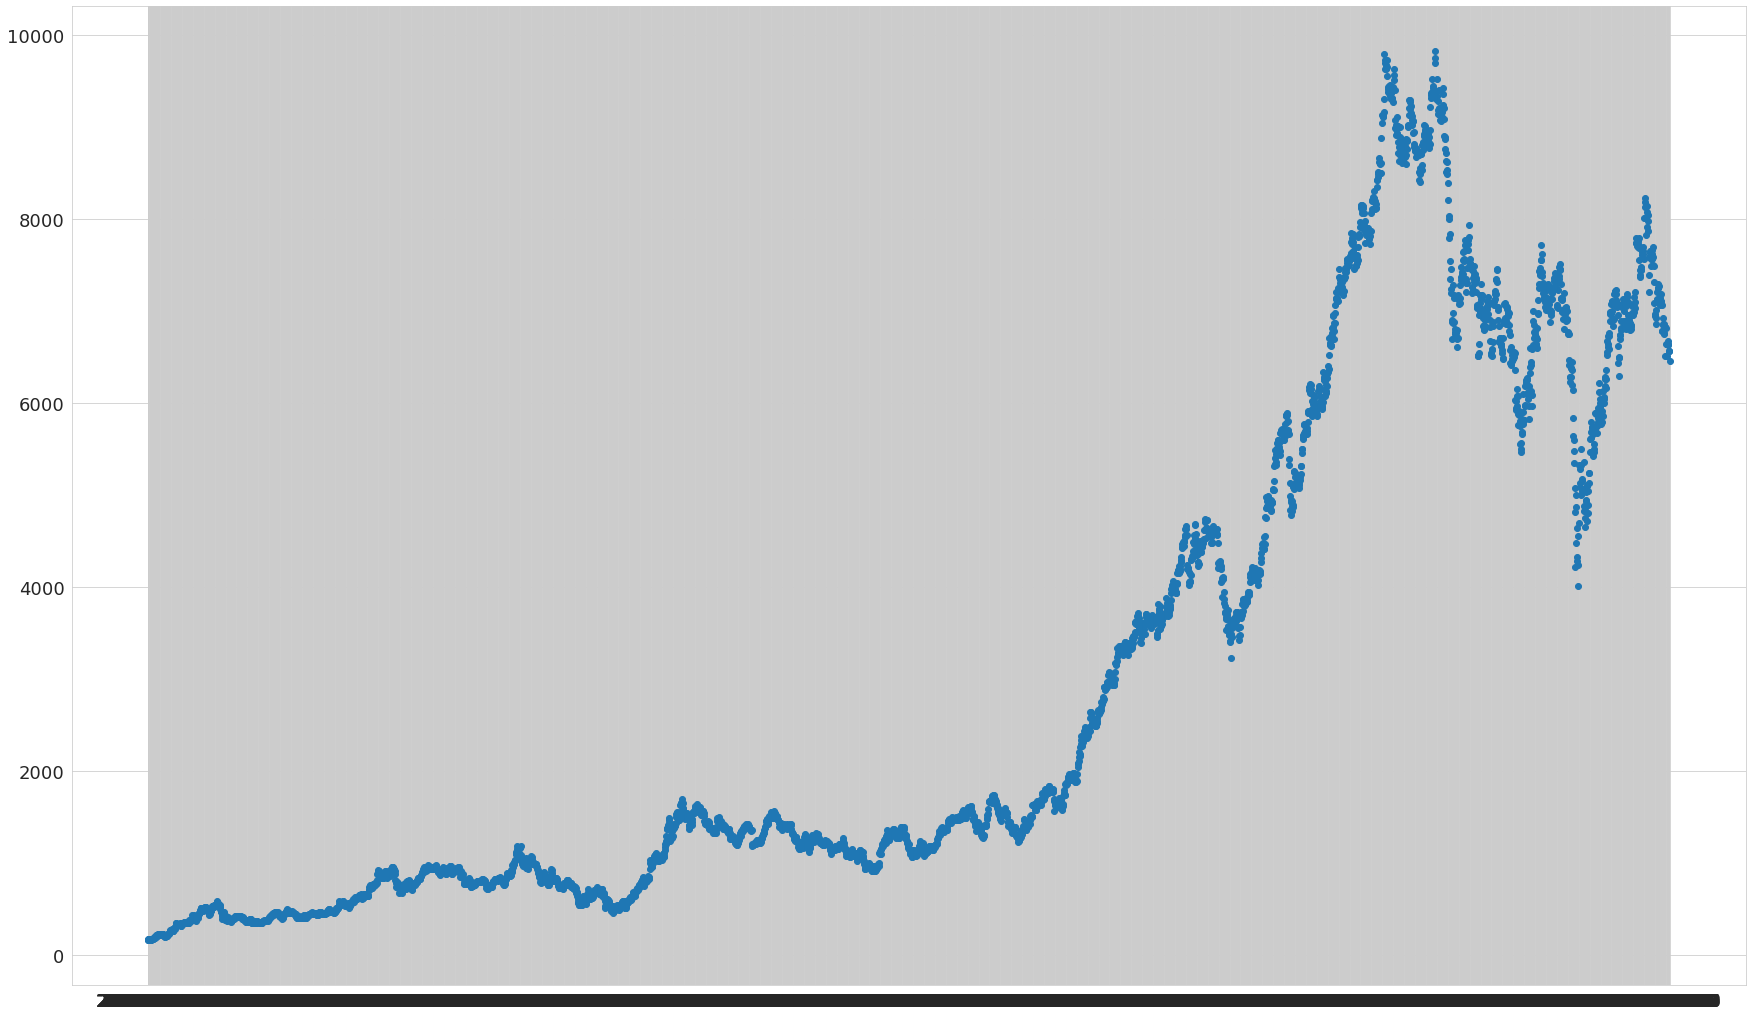

In [32]:
analysis_1 = df5[df5['Symbol'] == "MARUTI"]
plt.scatter(analysis_1.Date, analysis_1.Close);

(array([745., 883., 919., 160.,  49.,  54.,  86., 174., 134.,  99.,  68.,
        123., 104., 179., 251., 144.,  48.,  79.,  85.,  43.]),
 array([ 164.3   ,  647.7075, 1131.115 , 1614.5225, 2097.93  , 2581.3375,
        3064.745 , 3548.1525, 4031.56  , 4514.9675, 4998.375 , 5481.7825,
        5965.19  , 6448.5975, 6932.005 , 7415.4125, 7898.82  , 8382.2275,
        8865.635 , 9349.0425, 9832.45  ]),
 <BarContainer object of 20 artists>)

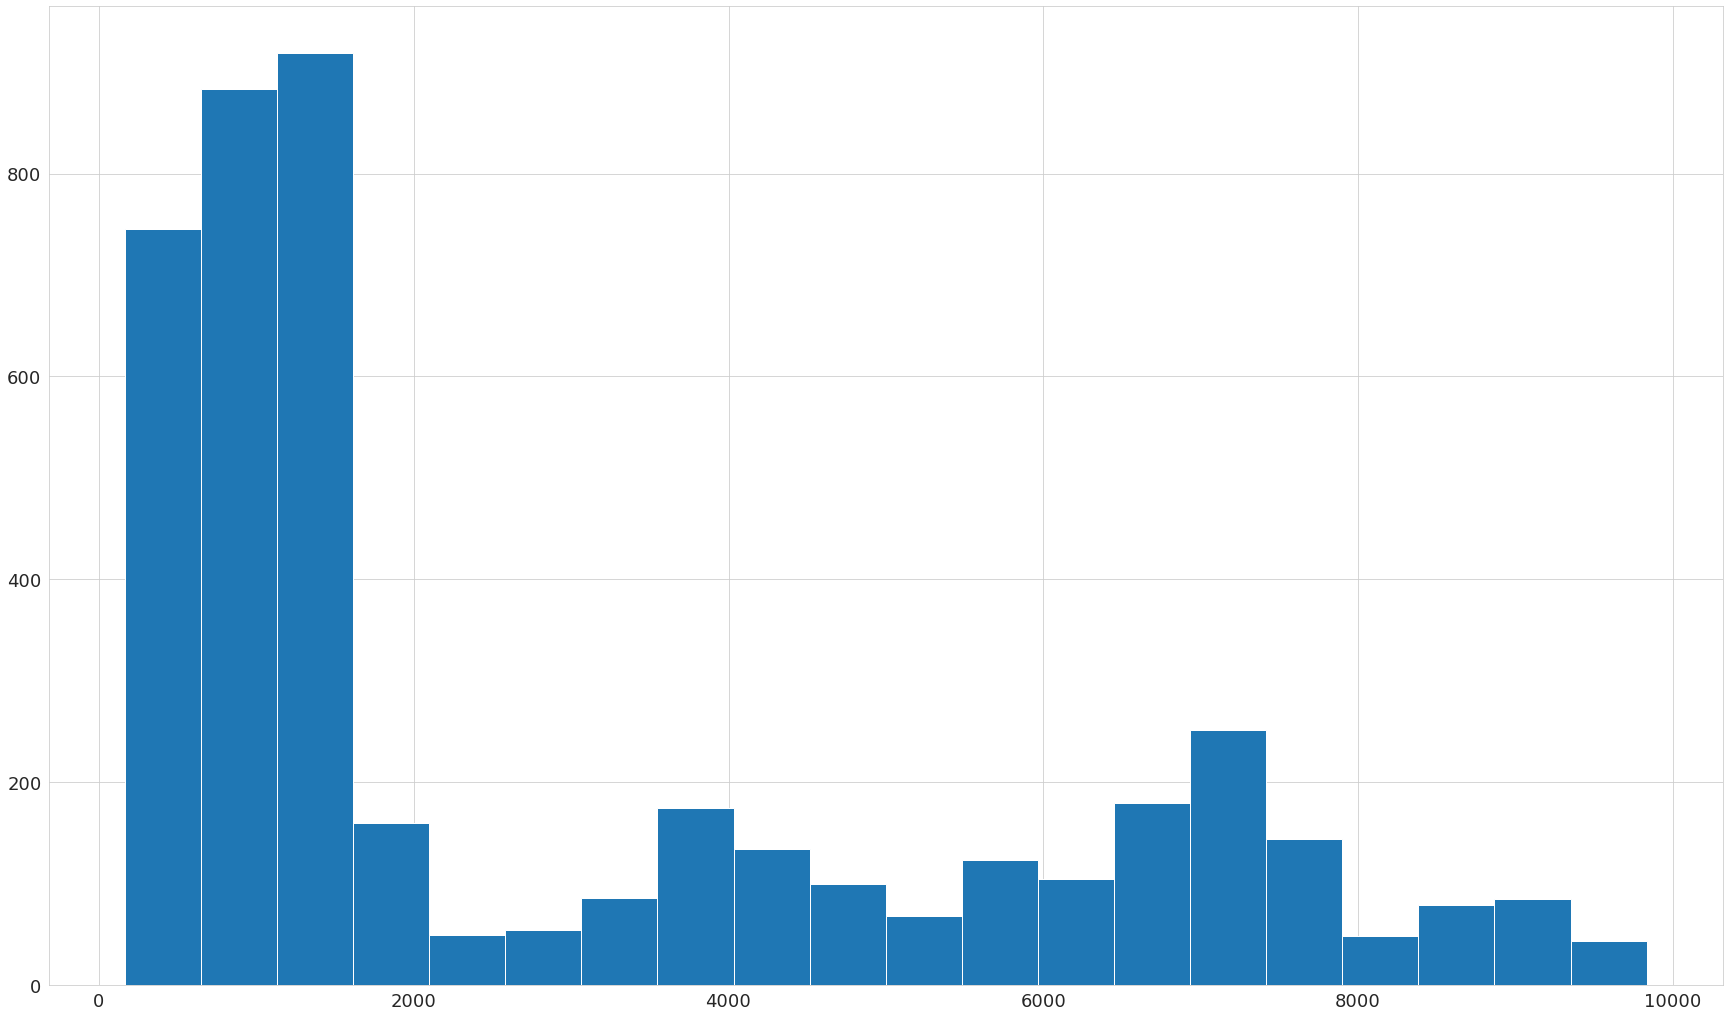

In [33]:
plt.hist(analysis_1.Close, bins= 20)

Now let us make another copy of dataset to be used in future.

In [34]:
df6 = NIFTY50_all_df.copy()

In [35]:
nse_india_metadata_df = NIFTY50_all_df.merge(stock_metadata_df, on="Symbol")
nse_india_metadata_df

,Symbol,Series_x,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,Series_y,ISIN Code
0,ADANIPORTS,EQ,135.50,137.1,141.00,135.00,140.10,140.00,138.13,1636196,2.260074e+13,18374.0,1004327.0,0.6138,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
1,ADANIPORTS,EQ,140.00,142.0,143.80,138.70,143.00,141.70,141.25,890591,1.257986e+13,15615.0,404925.0,0.4547,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
2,ADANIPORTS,EQ,141.70,144.0,150.55,143.15,149.50,149.40,146.72,1456077,2.136382e+13,31299.0,721545.0,0.4955,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
3,ADANIPORTS,EQ,149.40,151.9,157.60,150.25,155.40,155.40,153.76,1634070,2.512583e+13,23335.0,861145.0,0.5270,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
4,ADANIPORTS,EQ,155.40,155.4,155.40,145.10,146.40,146.75,149.54,1657609,2.478768e+13,12400.0,820653.0,0.4951,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207845,ZEEL,EQ,188.00,190.6,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028
207846,ZEEL,EQ,186.40,188.0,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028
207847,ZEEL,EQ,188.15,188.8,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028
207848,ZEEL,EQ,189.10,190.8,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028


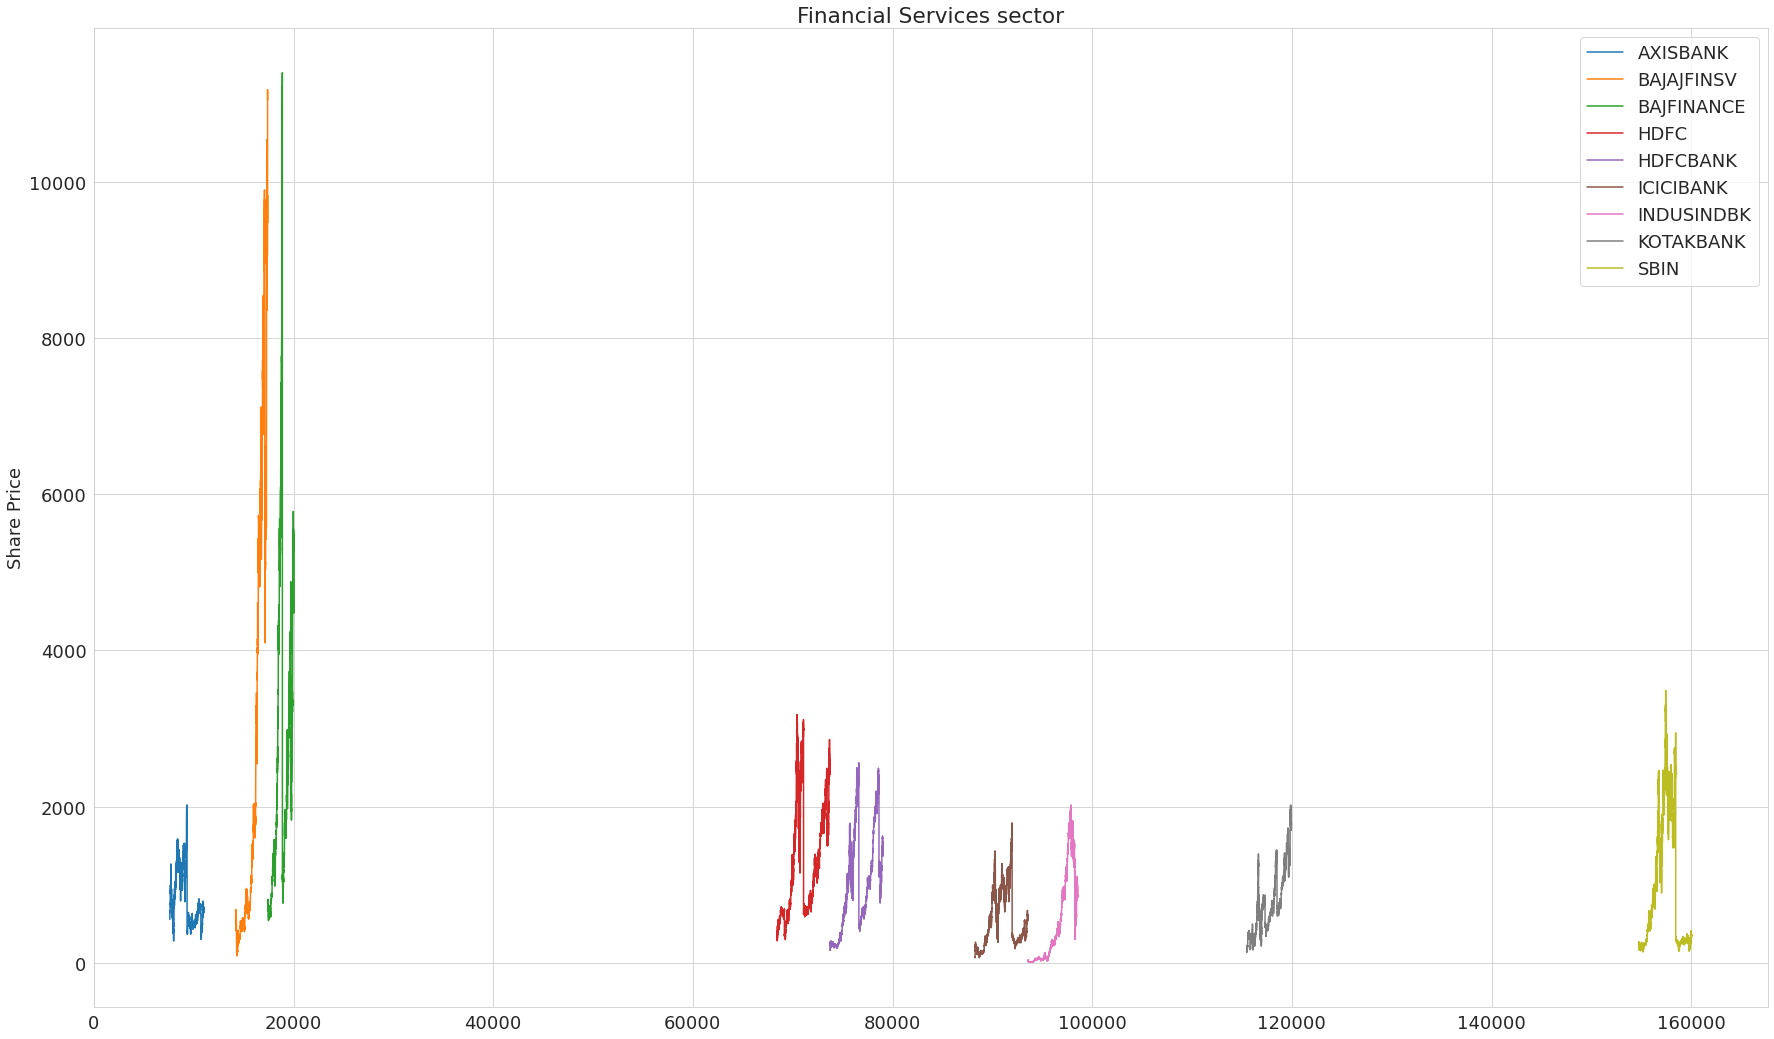

In [36]:
analysis_2 = nse_india_metadata_df[nse_india_metadata_df['Industry'] == "FINANCIAL SERVICES"]
analysis_2 = analysis_2.pivot(columns='Symbol', values='Close')
analysis_2.plot()
plt.title("Financial Services sector")
plt.ylabel("Share Price")
plt.legend()

Let us save and upload our work to Jovian before continuing

In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "swarn-shahi-cd-eee20/stock-market-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/swarn-shahi-cd-eee20/stock-market-analysis


'https://jovian.ai/swarn-shahi-cd-eee20/stock-market-analysis'

## VALUABLE INSIGHTS





**Here we will use mean() function which calculates the mean of the argument passed. Here we wanted the mean of closing value so we have passes "Close" to the function.**

In [39]:
df3.Close.mean()

Symbol
ADANIPORTS     294.111766
ASIANPAINT    1247.410903
AXISBANK       824.058898
BAJAJ-AUTO    2190.412196
BAJAJFINSV    2758.657451
                 ...     
UTIBANK        163.126203
VEDL           183.293489
WIPRO          754.474783
ZEEL           297.517507
ZEETELE        225.774415
Name: Close, Length: 65, dtype: float64

**The dataframe df3 contauns the set of unique shares which was found using unique() function. Here we will use that dataframe and use len() function which returns the length of dataframe.**

In [40]:
len(df3)
print("The dataset has information about {} different companies." .format(len(df3)))
#df7 = df3['Symbol']

The dataset has information about 65 different companies.


**We use max() to calculate the maximum of the column that is needed. We also use sort_values() function which sorts the values based on the column specified and then we can easily locate the highest and lowest value.**

In [41]:
df_2 = df3.Close.max()

In [60]:
print("The highest closing price is of \n {} .".format(df_2.sort_values().tail(1)))
print("The lowest closing price is of \n {} .".format(df_2.sort_values().head(1)))

The highest closing price is of 
 Symbol
EICHERMOT    32861.95
Name: Close, dtype: float64 .
The lowest closing price is of 
 Symbol
POWERGRID    236.5
Name: Close, dtype: float64 .


**Here we use merge() function to merge another dataframe which contains the column "INDUSTRY" specifying the kind of industry that particular share deals with.**

In [43]:
nifty_df = pd.read_csv('./nifty50-stock-market-data/NIFTY50_all.csv')
nse_india_metadata_df = NIFTY50_all_df.merge(stock_metadata_df, on="Symbol")

In [44]:
nse_india_metadata_df.Industry.unique()

array(['SERVICES', 'CONSUMER GOODS', 'FINANCIAL SERVICES', 'AUTOMOBILE',
       'TELECOM', 'ENERGY', 'PHARMA', 'METALS',
       'CEMENT & CEMENT PRODUCTS', 'IT', 'CONSTRUCTION',
       'FERTILISERS & PESTICIDES', 'MEDIA & ENTERTAINMENT'], dtype=object)

In [45]:
res = nse_india_metadata_df[nse_india_metadata_df['Industry']=='AUTOMOBILE']
print(res.Symbol.unique())

['BAJAJ-AUTO' 'EICHERMOT' 'HEROMOTOCO' 'M&M' 'MARUTI' 'TATAMOTORS']


In [46]:
nse_india_metadata_df
#stock_metadata_df

,Symbol,Series_x,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,Series_y,ISIN Code
0,ADANIPORTS,EQ,135.50,137.1,141.00,135.00,140.10,140.00,138.13,1636196,2.260074e+13,18374.0,1004327.0,0.6138,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
1,ADANIPORTS,EQ,140.00,142.0,143.80,138.70,143.00,141.70,141.25,890591,1.257986e+13,15615.0,404925.0,0.4547,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
2,ADANIPORTS,EQ,141.70,144.0,150.55,143.15,149.50,149.40,146.72,1456077,2.136382e+13,31299.0,721545.0,0.4955,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
3,ADANIPORTS,EQ,149.40,151.9,157.60,150.25,155.40,155.40,153.76,1634070,2.512583e+13,23335.0,861145.0,0.5270,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
4,ADANIPORTS,EQ,155.40,155.4,155.40,145.10,146.40,146.75,149.54,1657609,2.478768e+13,12400.0,820653.0,0.4951,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207845,ZEEL,EQ,188.00,190.6,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028
207846,ZEEL,EQ,186.40,188.0,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028
207847,ZEEL,EQ,188.15,188.8,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028
207848,ZEEL,EQ,189.10,190.8,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028


Now we calculate new formula for volatility.

**Volatility = ((Opening value-Closing value)/Opening value)/100**

We add a new column "Volatility" to the dataframe and then sort the dataframe based on volatility using sort_values() function to find most and least volatile share.

In [47]:
nse_india_metadata_df['Volatility'] = abs(((nse_india_metadata_df.Open-nse_india_metadata_df.Close)/nse_india_metadata_df.Open)*100)
cp_df = nse_india_metadata_df.copy()
maxim = cp_df.sort_values('Volatility').tail(1)
minim = cp_df.sort_values('Volatility').head(1)
print('The maximum volatile share is {} '.format(maxim['Company Name'].to_string(index= False)), end= " ")
print('with volatility of {} %'.format(maxim['Volatility'].to_string(index= False)))
print('The minimum volatile share is {} '.format(minim['Company Name'].to_string(index= False)), end= " ")
print('with volatility of {} %'.format(minim['Volatility'].to_string(index= False)))

The maximum volatile share is Indian Oil Corporation Ltd.  with volatility of 41.133333 %
The minimum volatile share is Asian Paints Ltd.  with volatility of 0.0 %


In [48]:
nse_india_metadata_df

,Symbol,Series_x,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,Series_y,ISIN Code,Volatility
0,ADANIPORTS,EQ,135.50,137.1,141.00,135.00,140.10,140.00,138.13,1636196,2.260074e+13,18374.0,1004327.0,0.6138,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042,2.115244
1,ADANIPORTS,EQ,140.00,142.0,143.80,138.70,143.00,141.70,141.25,890591,1.257986e+13,15615.0,404925.0,0.4547,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042,0.211268
2,ADANIPORTS,EQ,141.70,144.0,150.55,143.15,149.50,149.40,146.72,1456077,2.136382e+13,31299.0,721545.0,0.4955,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042,3.750000
3,ADANIPORTS,EQ,149.40,151.9,157.60,150.25,155.40,155.40,153.76,1634070,2.512583e+13,23335.0,861145.0,0.5270,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042,2.304147
4,ADANIPORTS,EQ,155.40,155.4,155.40,145.10,146.40,146.75,149.54,1657609,2.478768e+13,12400.0,820653.0,0.4951,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042,5.566281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207845,ZEEL,EQ,188.00,190.6,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028,2.203568
207846,ZEEL,EQ,186.40,188.0,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028,0.079787
207847,ZEEL,EQ,188.15,188.8,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028,0.158898
207848,ZEEL,EQ,189.10,190.8,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894,Zee Entertainment Enterprises Ltd.,MEDIA & ENTERTAINMENT,EQ,INE256A01028,2.227463


Now let us analyse mean volatility of each share using a bar plot.

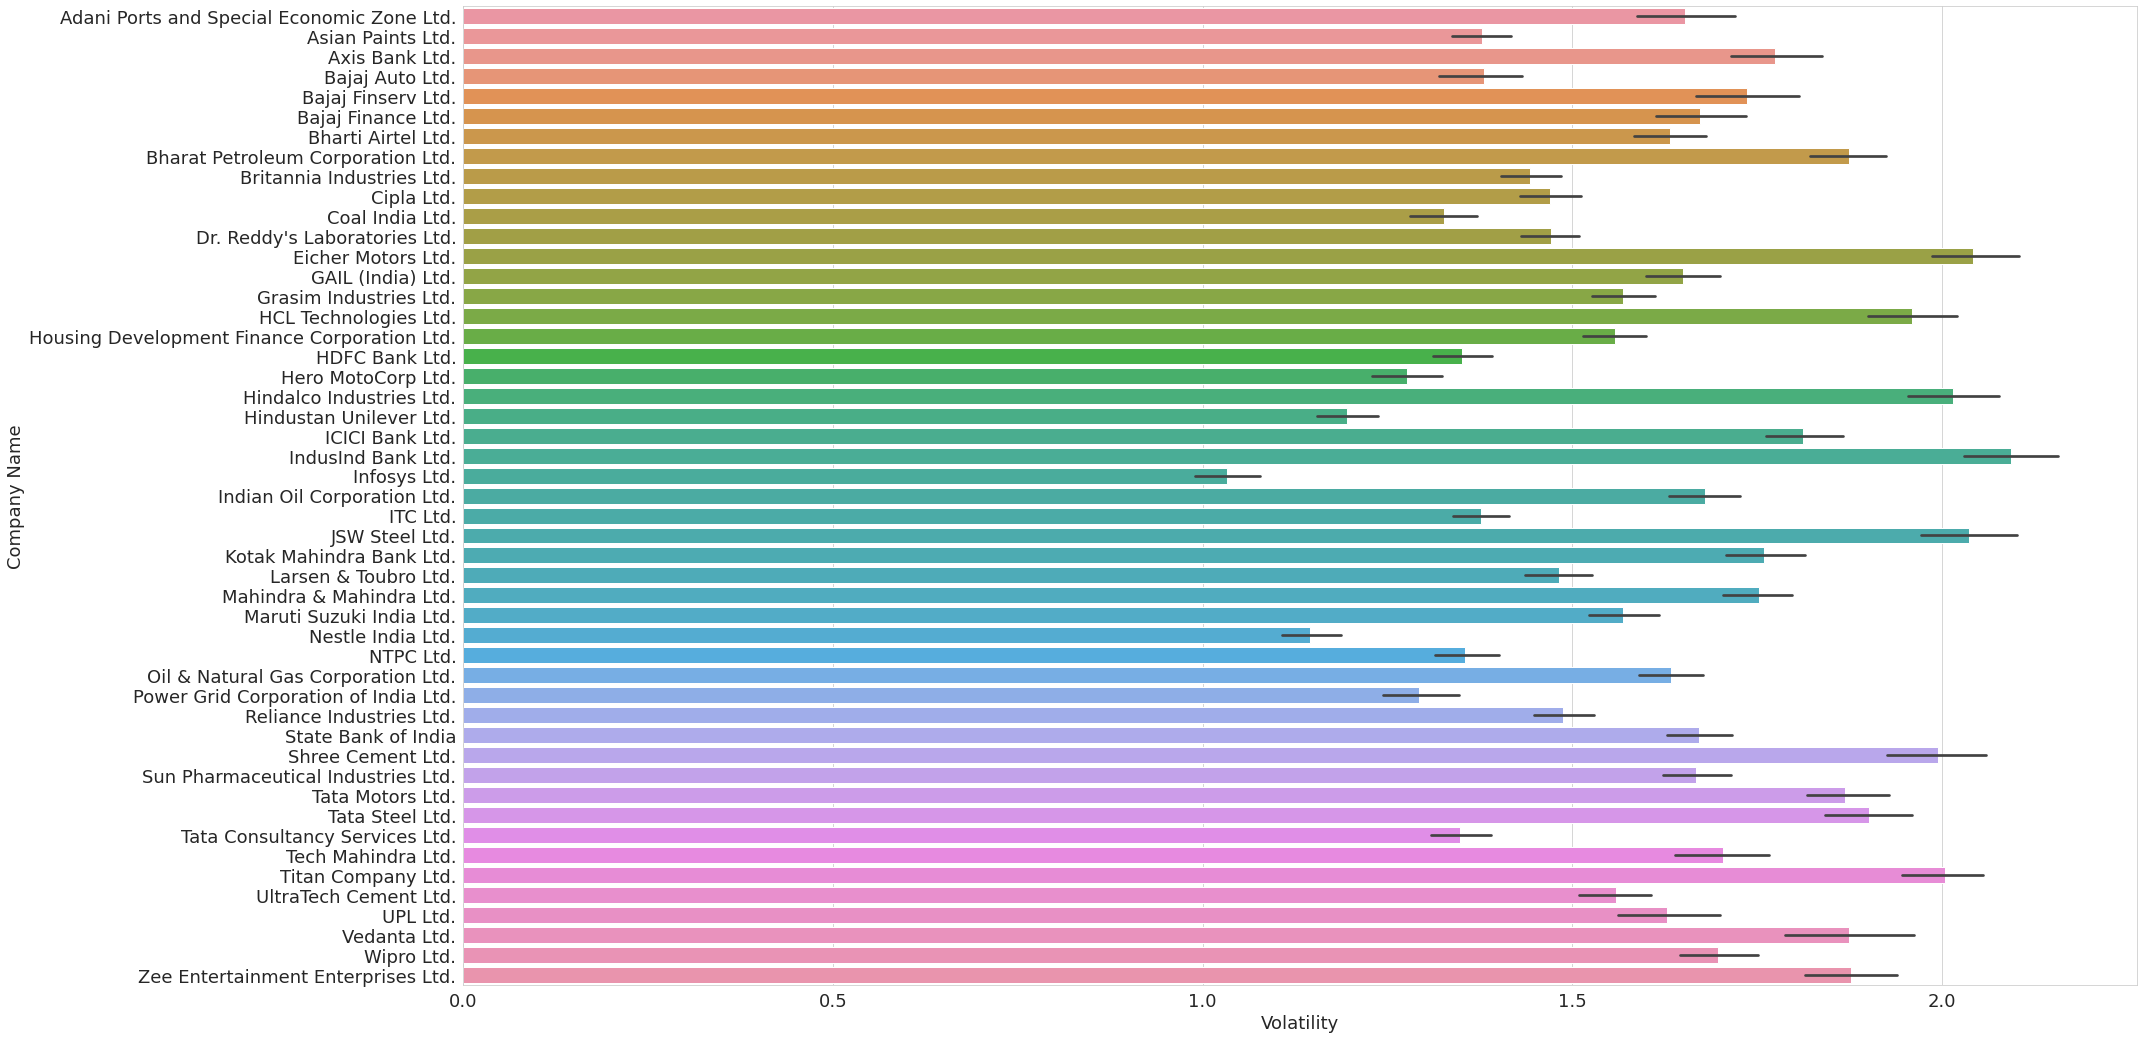

In [51]:
sns.barplot(x='Volatility', y='Company Name', data=nse_india_metadata_df);

Let us save and upload our work to Jovian before continuing.

In [61]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Inferences and Conclusion

On analysing the data, we were able to find when the peaks fror various share price occurs, how volatile the share is and how various sectors have evolved with time. We also found out the most and least volatile share. We plotted various graphs to study each share individually. In the process I also became familiar with various functions and their use.

In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "swarn-shahi-cd-eee20/stock-market-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/swarn-shahi-cd-eee20/stock-market-analysis


'https://jovian.ai/swarn-shahi-cd-eee20/stock-market-analysis'

## References and Future Work

With this dataset, you can apply various algorithm to predict how the shares would perform in future.

Link to the dataset : 'https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=stock_metadata.csv'
References : https://pandas.pydata.org/docs/
             https://stackoverflow.com/questions/44984332/print-specific-rows-from-dataframe-using-a-condition
             https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe
       https://stackoverflow.com/questions/46534653/error-attributeerror-dataframegroupby-object-has-no-attribute-while-groupby
             https://www.geeksforgeeks.org/find-maximum-values-position-in-columns-and-rows-of-a-dataframe-in-pandas/

In [56]:
import jovian

In [57]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "swarn-shahi-cd-eee20/stock-market-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/swarn-shahi-cd-eee20/stock-market-analysis


'https://jovian.ai/swarn-shahi-cd-eee20/stock-market-analysis'